# PIZZA SALES ANALYSIS


### Importing Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

### Import Raw Data

In [90]:
df = pd.read_csv("C:/Users/Sharmada/Downloads/pizza_sales.csv")

### MetaData of Raw Data

In [91]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [92]:
df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [93]:
print("The MetaData of Dataset ",df.shape)

The MetaData of Dataset  (48620, 12)


In [94]:
print("The No of Rows of Dataset : ",df.shape[0])

The No of Rows of Dataset :  48620


In [95]:
print("The No of Columns of Dataset : ",df.shape[1])

The No of Columns of Dataset :  12


In [96]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [98]:
df.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [99]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


### KPI's

In [100]:
total_revenue = df['total_price'].sum()
total_pizzas_sold = df ['quantity'].sum()
total_orders = df ['order_id'].nunique()
avg_order_value = total_revenue / total_orders
avg_pizzas_per_order = total_pizzas_sold/ total_orders

print(f"Total Revenue:${total_revenue:,.2f}")
print(f"Total Pizzas Sold: {total_pizzas_sold:,}")
print(f"Total Orders: {total_orders:,}")
print(f"Avg Order Value: ${avg_order_value:,.2f}")
print(f"Average Pizza per Order: {avg_pizzas_per_order:,.2f}")

Total Revenue:$817,860.05
Total Pizzas Sold: 49,574
Total Orders: 21,350
Avg Order Value: $38.31
Average Pizza per Order: 2.32


### Charts

#### Ingredient Analysis

In [113]:
ingredient = (
df['pizza_ingredients']
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Count', 'pizza_ingredients': 'Indegredients'})
)

print(ingredient.head(10))

               Count  Indegredients
0             Garlic          27422
1           Tomatoes          26601
2         Red Onions          19547
3        Red Peppers          16284
4  Mozzarella Cheese          10333
5          Pepperoni          10300
6            Spinach          10012
7          Mushrooms           9624
8            Chicken           8443
9          Capocollo           6572


#### Daily Trend - Total Orders

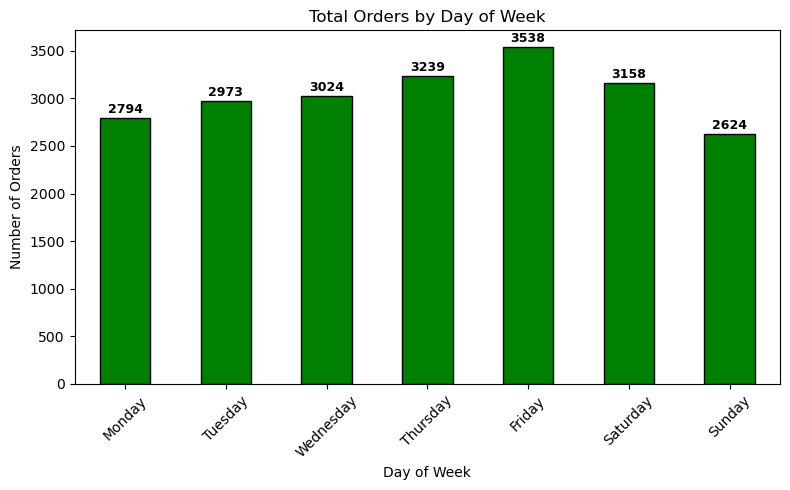

In [112]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

df['day_name'] = df['order_date'].dt.day_name()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df['day_name'] = pd.Categorical(df['day_name'], categories= weekday_order, ordered=True)

orders_by_day = df.groupby('day_name', observed=False) ['order_id'].nunique()

ax= orders_by_day.plot(kind='bar', figsize=(8,5), color='green', edgecolor='black')

plt.title("Total Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks (rotation=45)

for i, val in enumerate(orders_by_day):
    plt.text(i, val + 20, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### Daily Trend - Total Revenue

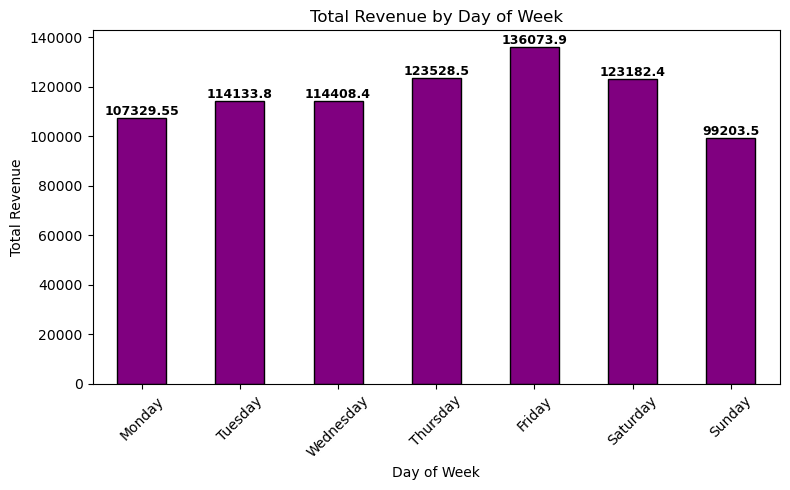

In [111]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

df['day_name'] = df['order_date'].dt.day_name()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df['day_name'] = pd.Categorical(df['day_name'], categories= weekday_order, ordered=True)

orders_by_day = df.groupby('day_name', observed=False) ['total_price'].sum()

ax= orders_by_day.plot(kind='bar', figsize=(8,5), color='purple', edgecolor='black')

plt.title("Total Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.xticks (rotation=45)

for i, val in enumerate(orders_by_day):
    plt.text(i, val + 20, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### Hourly Trend - Total Orders


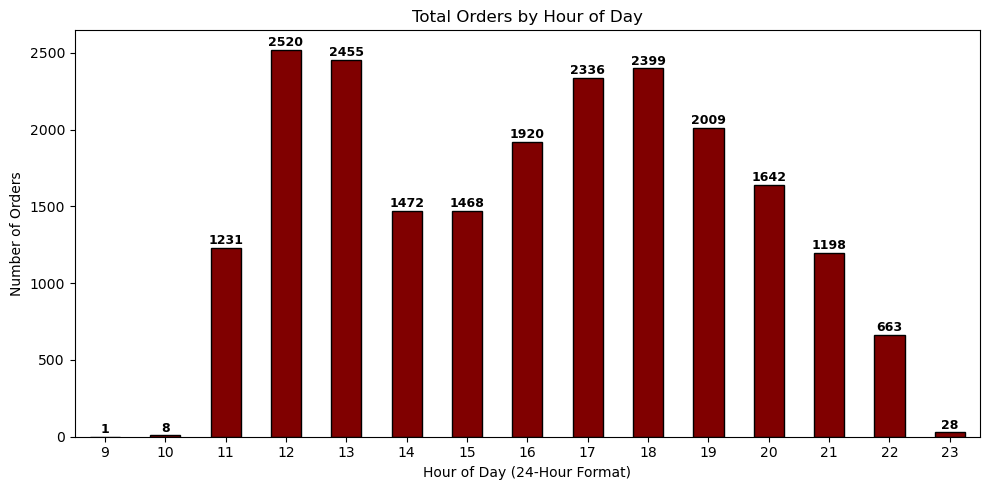

In [110]:
df ['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

df ['order_hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('order_hour', observed=False) ['order_id'].nunique()

ax = orders_by_hour.plot(kind='bar', figsize=(10,5), color='maroon', edgecolor='black')

plt.title("Total Orders by Hour of Day")
plt.xlabel("Hour of Day (24-Hour Format)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)

for i, val in enumerate(orders_by_hour):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### Monthly Trend - Total Orders

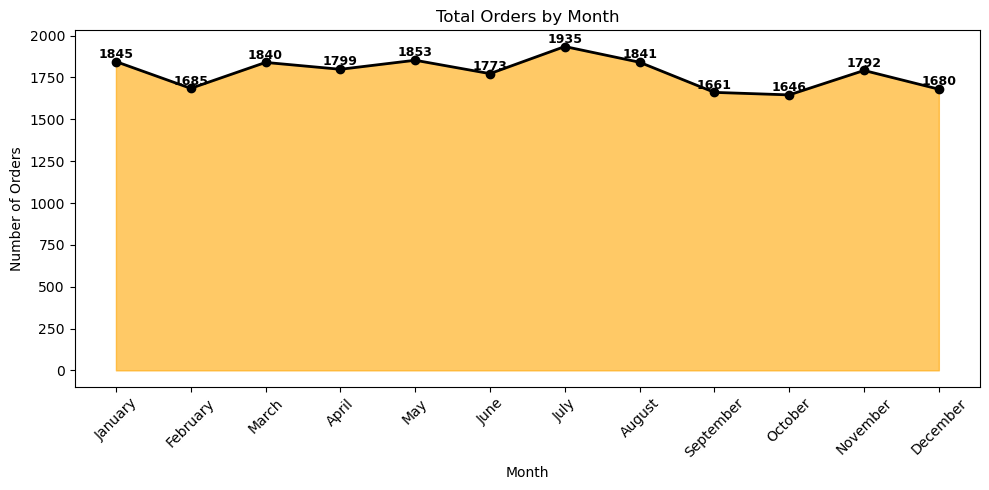

In [109]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

df['month_name'] = df['order_date'].dt.month_name()

month_order= ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

orders_by_month= df.groupby('month_name', observed=False) ['order_id'].nunique()

plt.figure(figsize=(10,5))
plt.fill_between(orders_by_month.index, orders_by_month.values, color="orange", alpha=0.6)
plt.plot(orders_by_month. index, orders_by_month.values, color="black", linewidth=2, marker='o')

plt.title("Total Orders by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_month):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()

plt.show()

#### % of Sales by Category


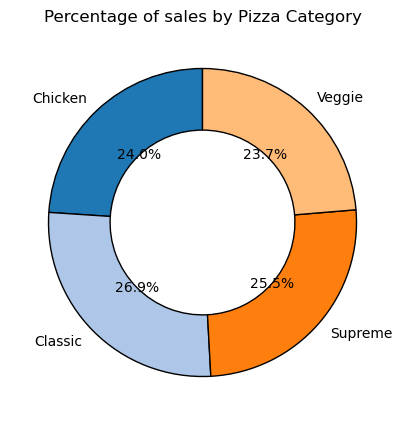

In [108]:
category_sales = df.groupby('pizza_category') ['total_price'].sum()

category_pct = category_sales / category_sales.sum()* 100

plt.figure(figsize=(5,5))
colors = plt.get_cmap('tab20').colors #nice color palette

plt.pie(category_pct, labels =category_pct.index, autopct='%1.1f%%', startangle=90, colors= colors, wedgeprops={"edgecolor": "black", "width":0.4})
plt.title("Percentage of sales by Pizza Category")
plt.show()

#### % Sales by Pizza Size & Category

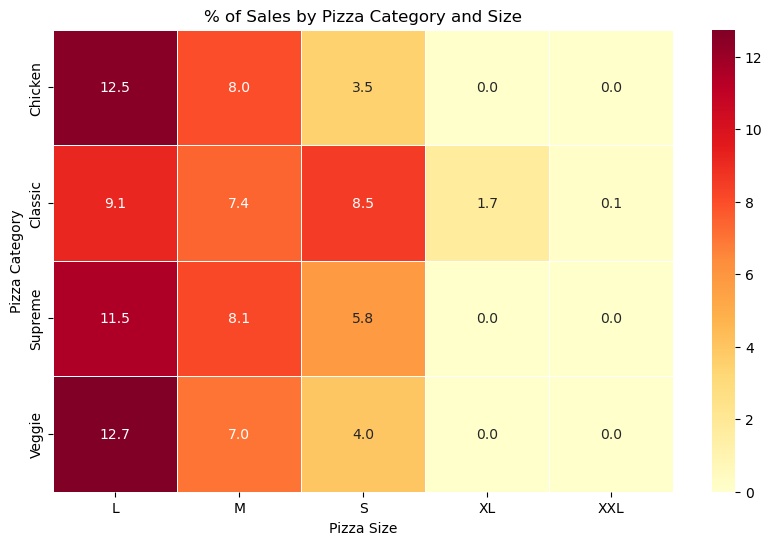

In [107]:
sales_pivot = df.pivot_table(

index='pizza_category',

columns='pizza_size',

values='total_price',

aggfunc='sum',

fill_value=0

)


sales_pct= sales_pivot / sales_pivot.sum().sum() * 100

plt.figure(figsize=(10,6))
sns.heatmap(sales_pct, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5)
plt.title("% of Sales by Pizza Category and Size")
plt.ylabel("Pizza Category")
plt.xlabel("Pizza Size")
plt.show()

#### Total Pizzas Sold by Pizza Category


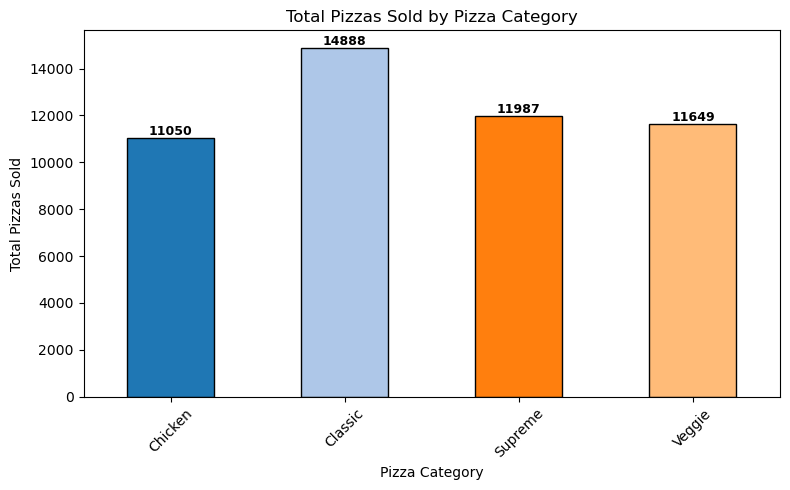

In [106]:
pizzas_by_category= df.groupby('pizza_category') ['quantity'].sum()

colors =list(plt.get_cmap('tab20').colors)

colors =colors [: len(pizzas_by_category)]

ax =pizzas_by_category.plot(kind='bar', figsize=(8,5), color= colors, edgecolor='black')

plt.title("Total Pizzas Sold by Pizza Category")
plt.xlabel("Pizza Category")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, val in enumerate(pizzas_by_category):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### Top 5 Best-Selling Pizzas

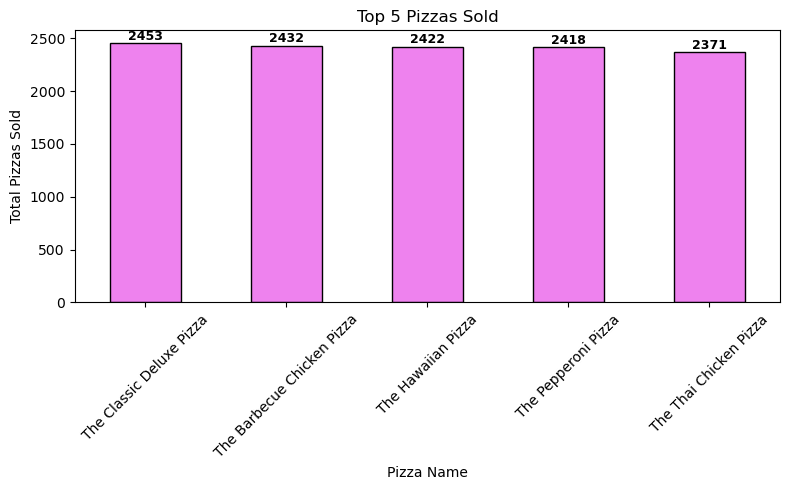

In [105]:
pizzas_by_name = df.groupby('pizza_name') ['quantity'].sum()

top5= pizzas_by_name.sort_values(ascending=False).head (5)

ax= top5.plot(kind='bar', figsize=(8,5), color='violet', edgecolor='black')

plt.title("Top 5 Pizzas Sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, val in enumerate (top5):
    plt.text(i, val+ 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### Top 5 Best-Selling Pizzas - Total Sales

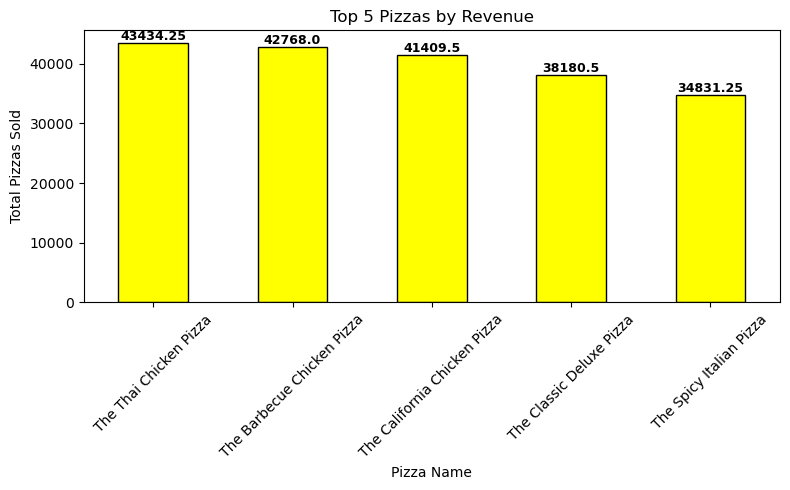

In [104]:
pizzas_by_name = df.groupby('pizza_name') ['total_price'].sum()

top5= pizzas_by_name.sort_values(ascending=False).head (5)

ax= top5.plot(kind='bar', figsize=(8,5), color='yellow', edgecolor='black')

plt.title("Top 5 Pizzas by Revenue")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, val in enumerate (top5):
    plt.text(i, val+ 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### Bottom 5 Least-Selling Pizzas

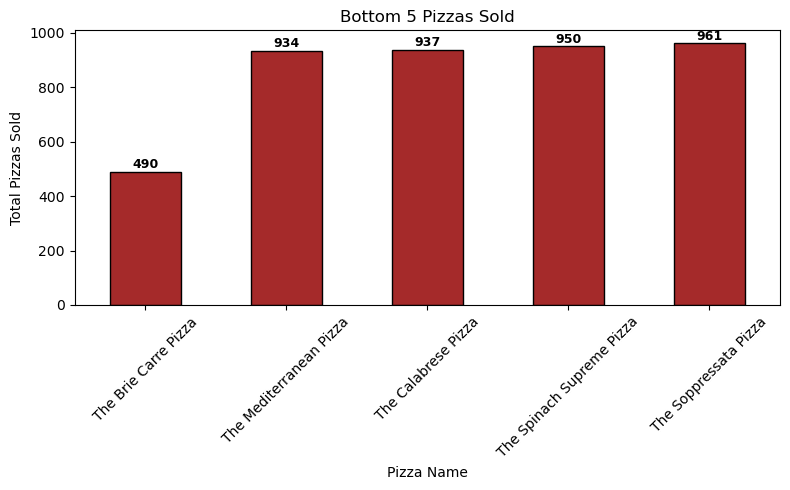

In [103]:
pizzas_by_name = df.groupby('pizza_name') ['quantity'].sum()

bottoms = pizzas_by_name.sort_values (ascending=True).head(5)

ax= bottoms.plot(kind='bar', figsize=(8,5), color='brown', edgecolor="black")

plt.title("Bottom 5 Pizzas Sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, val in enumerate(bottoms):
    plt.text(i, val +2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### Bottom 5 Least-Selling Pizzas - Total Sales

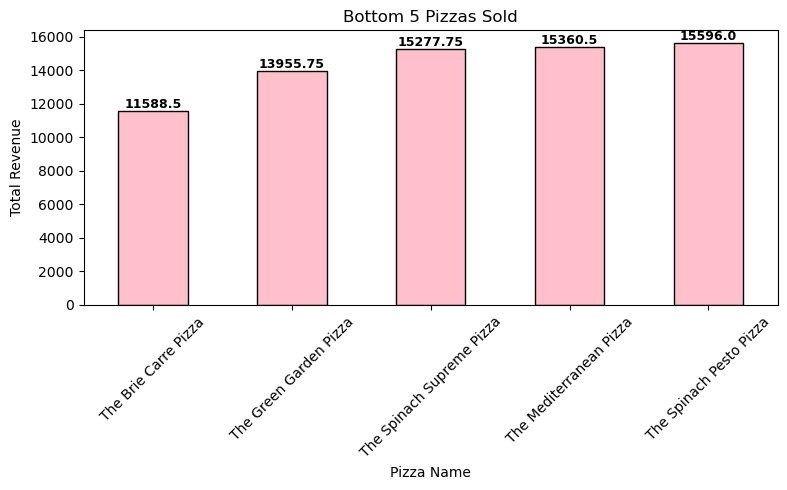

In [102]:
pizzas_by_name = df.groupby('pizza_name') ['total_price'].sum()

bottoms = pizzas_by_name.sort_values (ascending=True).head(5)

ax= bottoms.plot(kind='bar', figsize=(8,5), color='pink', edgecolor="black")

plt.title("Bottom 5 Pizzas Sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i, val in enumerate(bottoms):
    plt.text(i, val +2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()